# MOwNiT 

## Laboratorium 3

### Interpolacja

Przed uruchomieniem trzeba zainstalować pakiet:

```julia
Pkg.add("Interpolations")
```

In [1]:
# using Pkg
# Pkg.add("Interpolations")

In [2]:
using Plots

In [3]:
# wylosowanie węzłów interpolacji
xs =  1:1:10
ys = [rand() for x in xs]

10-element Vector{Float64}:
 0.27982237417078226
 0.15781445847661058
 0.472964992484061
 0.5166397880925998
 0.9031457113334457
 0.31910345480760716
 0.008958528733633009
 0.2635507847470584
 0.7792603527651251
 0.7496951618357407

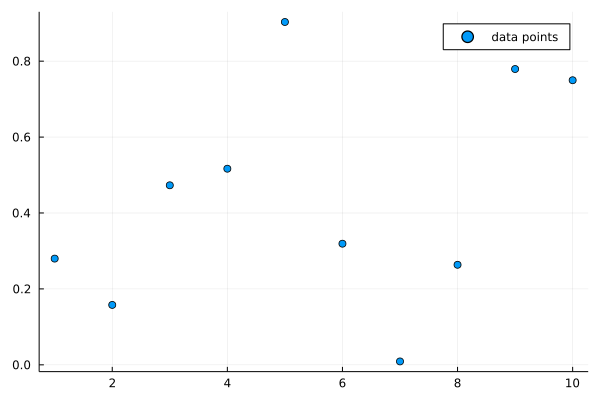

In [4]:
scatter(xs,ys, label="data points")

In [5]:
# interpolacja wielomianowa w pakiecie Polynomials
# https://juliamath.github.io/Polynomials.jl/stable/
# import Pkg; Pkg.add("Polynomials")
# using Polynomials
f=fit(xs, ys)
plot!(f,  extrema(xs)..., label="polynomial interpolation")

LoadError: UndefVarError: fit not defined

In [6]:
# gęste punkty do rysowania wykresów funkcji interpolujacych
xsf=1:0.01:10

1.0:0.01:10.0

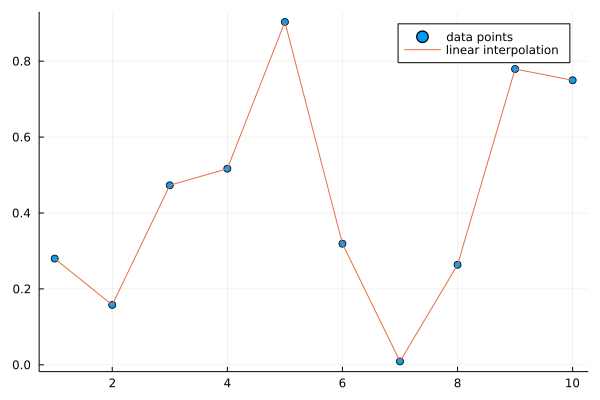

In [7]:
#  interpolacja liniowa z pakietu Interpolations - przykład
using Interpolations
interp_linear = LinearInterpolation(xs, ys)
ysf=[interp_linear(x) for x in xsf]
plot!(xsf,ysf, label="linear interpolation")

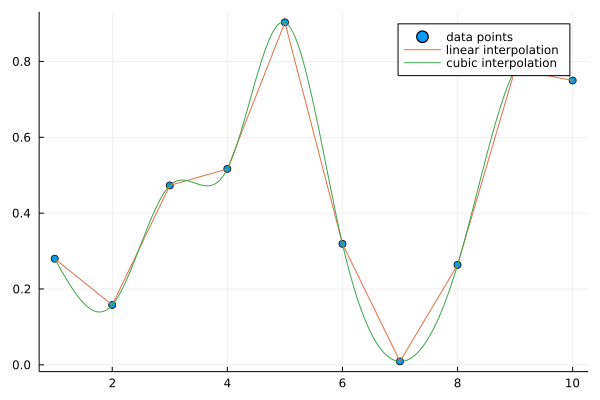

In [8]:
#  interpolacja szescienna 
interp_cubic = CubicSplineInterpolation(xs, ys)
ysf2=[interp_cubic(x) for x in xsf]
plot!(xsf,ysf2, label="cubic interpolation")

In [9]:
#Interpolacja szescienna to BSpline z warunkami brzegowymi Line i OnGrid. 
#Więcej o konfiguracji warunkow brzegowych w
# dokumentacji https://github.com/JuliaMath/Interpolations.jl/blob/master/doc/Interpolations_algebra.pdf
interp_cubic

10-element extrapolate(scale(interpolate(OffsetArray(::Vector{Float64}, 0:11), BSpline(Cubic(Line(OnGrid())))), (1:1:10,)), Throw()) with element type Float64:
 0.27982237417078226
 0.15781445847661055
 0.472964992484061
 0.5166397880925998
 0.9031457113334457
 0.31910345480760716
 0.008958528733632985
 0.2635507847470584
 0.7792603527651252
 0.7496951618357407

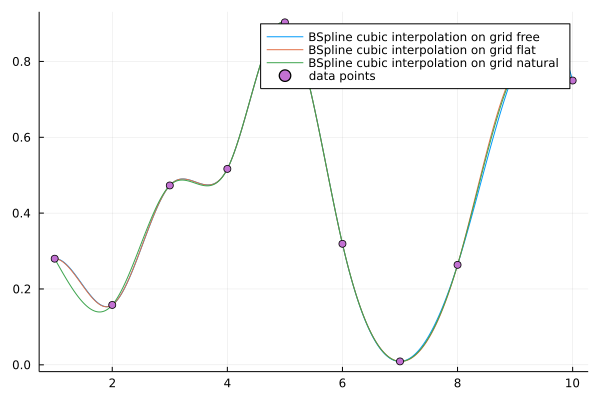

In [10]:
# Przyklad konfiguracji  BSpline-ów
itp = interpolate(ys, BSpline(Cubic(Free(OnGrid()))))
ysf3=[itp(x) for x in xsf]
plot(xsf,ysf3, label="BSpline cubic interpolation on grid free")
itp = interpolate(ys, BSpline(Cubic(Flat(OnGrid()))))
ysf3=[itp(x) for x in xsf]
plot!(xsf,ysf3, label="BSpline cubic interpolation on grid flat")
itp = interpolate(ys, BSpline(Cubic(Natural(OnGrid()))))
ysf3=[itp(x) for x in xsf]
plot!(xsf,ysf3, label="BSpline cubic interpolation on grid natural")

scatter!(xs,ys, label="data points")


### Zadania
1. Napisać własną implementację interpolacji wielomianowej stosując wprost wzór na wielomian interpolacyjny  Lagrange'a .  Przetestować swoją implementację na wylosowanych węzłach interpolacji w wybranym przedziale. Narysować wykres wielomianu interpolacyjnego w tym przedziale wraz z wezlami interpolacji. <b>(1 pkt)</b>

1. Zrobic to samo dla metody  Newtona (metoda ilorazów róznicowych).Narysować wykres wielomianu interpolacyjnego otrzymanego metodą Newtona dla tych samych danych, co w poprzednim punkcie. Zadbać o to, żeby ilorazy wyliczać tylko raz dla danego zbioru wezłow interpolacji, według schematu z pakietu Interpolations http://juliamath.github.io/Interpolations.jl/stable/interpolations/ : 
   1. napisać funkcję `NewtonInterpolation`, która wylicza ilorazy różnicowe i zwraca "obiekt interpolacyjny" `newt`
   1. napisać funkcję która wylicza wartość wielomianu dla obiektu `newt` w punkcie x za pomocą  <b>schematu Hornera dla postaci Newtona </b> <b>(2 pkt)</b>

1. Zastosować interpolację wielomianową z pakietu Polynomials do tych samych danych, co w poprzednich punktach. Porównać wszystkie 3 wyniki interpolacji wielomianowej na jednym wykresie. Co zauważamy? Dlaczego? <b>(1 pkt)</b>

1. Porównać metody poprzez pomiar czasu wykonania dla zmiennej ilości węzłow interpolacji. Uwaga: dodatkowo, dla metody Newtona i pakietu Polynomials należy osobno zmierzyć czas wyliczania wielomianu i osobno czas wyliczania wartości w punkcie. Dokonać pomiaru 10 razy i policzyć wartość średnią oraz oszacować błąd pomiaru za pomocą odchylenia standardowego; wyniki przedstawić na wykresach. Jako narzędzie do analizy danych użyć Julia DataFrames <b>(2 pkt)</b>

1. Zaimplementować algorytm Neville’a i sprawdzić (dla kilku wybranych punktów), czy daje te same wartości wielomianu co wybrana interpolacja wielomianowa.<b>(1 pkt)</b>

1. Poeksperymentować z  interpolacją funkcjami sklejanymi (minimum dwie różne funkcje sklejane),  narysować wykresy i porównać z wykresami interpolacji wielomianowej. <b>Zademonstrować  efekt Rungego</b> <b>(1 pkt)</b>. 

## Zadanie 1

**Wielomian interpolacyjny Lagrange'a**

In [11]:
using Plots
using Random

In [12]:
function L(x, k, xn)
    numerator = 1
    denominator = 1
    
    for i in 1:length(xn)
        if xn[k] != xn[i]    
            numerator *= (x - xn[i])
            denominator *= (xn[k] - xn[i])
        end
    end     
    
    return numerator/denominator
end

function lagrange_interpolate(x, xn, yn)
    result = 0
    
    for i in 1:length(xn)
        result += L(x,i,xn) * yn[i]
    end
    
    return result
end

lagrange_interpolate (generic function with 1 method)

In [13]:
xn =  1:1:10
yn = [rand() for x in xn]
xn_lagrange = 1:0.001:10
yn_lagrange = [lagrange_interpolate(x, xn, yn) for x in xn_lagrange];

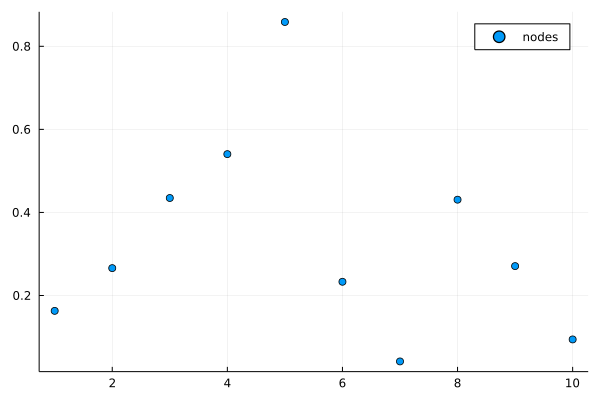

In [14]:
plot_1 = scatter(xn, yn, label="nodes")

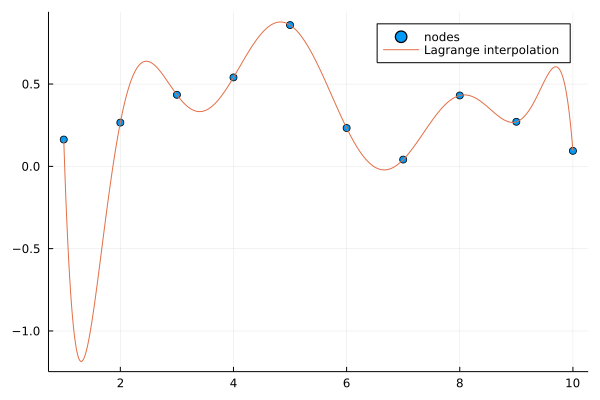

In [15]:
plot_1 = plot!(xn_lagrange, yn_lagrange, label="Lagrange interpolation")

## Zadanie 2

## Zadanie 3

## Zadanie 4

## Zadanie 5

**Implementacja algorytmu Neville'a i przyrównanie wyników do wybranej interpolacji wielomianowej**

In [26]:
function neville_interpolate(xn, ys, x)
    
    # initialize matrix with zeros
    result = zeros(length(xn),length(xn))
    
    for i in 1:(length(ys))
        result[1, i] = ys[i]
    end
    d = length(xn) - 1
    for i in 2:length(xn)
        for j in 1:d
            result[i,j] =
            (
                ((xn[j] - x) * result[i - 1,j + 1] + (x - xn[j + i - 1]) * result[i - 1, j])
                / (xn[j] - xn[j + i - 1])
            )
        end
        d -= 1
    end
    return result[10,1]
end

neville_interpolate (generic function with 1 method)

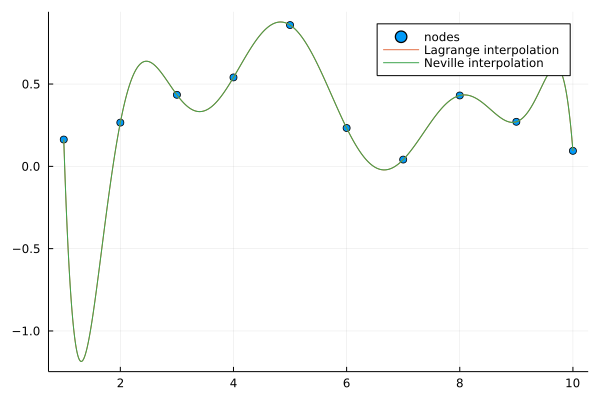

In [27]:
xn_neville = 1:0.001:10
yn_neville = [neville_interpolate(xn, yn, x) for x in xn_neville];

plot_5 = scatter(xn, yn, label="nodes")
plot_5 = plot!(xn_lagrange, yn_lagrange, label="Lagrange interpolation")
plot_5 = plot!(xn_neville, yn_neville, label="Neville interpolation")

## Zadanie 6

**Funkcje sklejane**

In [28]:
using Interpolations

In [56]:
x_values_6 = 1:10
y_values_6 = yn
# y_values_6 = [rand() for x in x_values_6];
x_values_interp = 1:0.001:10

lin_interpolation = LinearInterpolation(x_values_6, y_values_6)
quad_interpolation = interpolate(y_values_6, BSpline(Quadratic(Free(OnGrid()))))
cubic_interpolation = CubicSplineInterpolation(x_values_6, y_values_6)

results_lin = [lin_interpolation(x) for x in x_values_interp]
results_quad = [quad_interpolation(x) for x in x_values_interp]
results_cubic = [cubic_interpolation(x) for x in x_values_interp]

9001-element Vector{Float64}:
 0.16295988186775068
 0.1630312906744861
 0.1631026996701531
 0.16317410904368307
 0.16324551898400766
 0.16331692968005826
 0.16338834132076654
 0.1634597540950639
 0.163531168191882
 0.16360258380015213
 0.16367400110880603
 0.1637454203067751
 0.16381684158299092
 ⋮
 0.09565435868865038
 0.09552031621386248
 0.09538627629128939
 0.09525223866570943
 0.0951182030819016
 0.09498416928464411
 0.09485013701871553
 0.09471610602889415
 0.09458207605995893
 0.09444804685668819
 0.09431401816386016
 0.09417998972625385

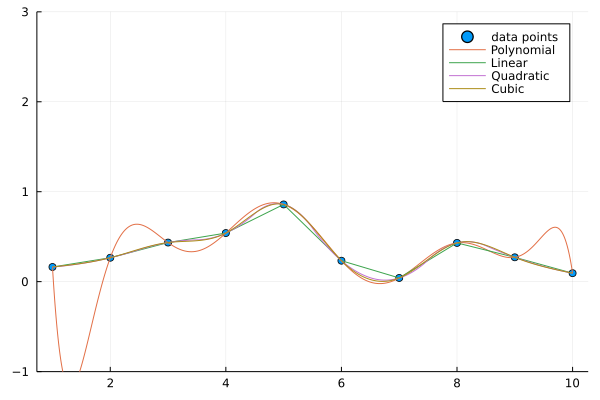

In [63]:
scatter(x_values_6, y_values_6, label="data points", ylim=(-1, 2))
plot!(xn_neville, yn_neville, label="Polynomial")
plot!(x_values_interp, results_lin, label="Linear")
plot!(x_values_interp, results_quad, label="Quadratic")
plot!(x_values_interp, results_cubic, label="Cubic")

**Efekt Rungego**

In [139]:
using Plots
using Polynomials

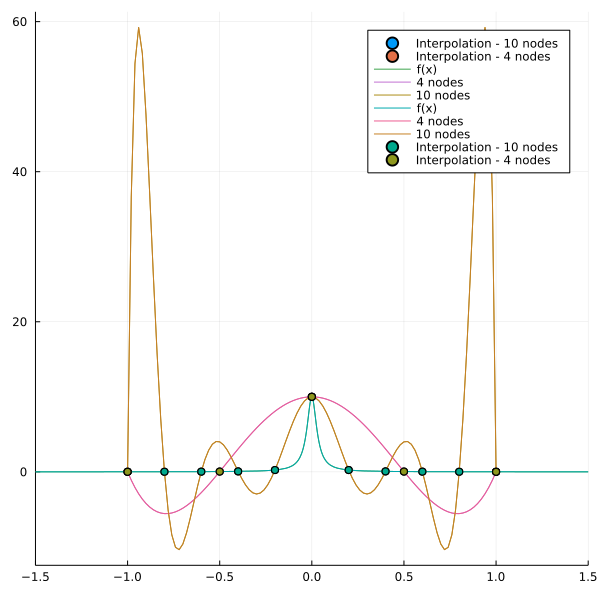

In [44]:
fun(x) = 1 / (100x^2 + 0.1);

x_1 = -1:0.5:1
y_1 = [1 / (100x^2 + 0.1) for x in x_1]

x_2 = -1:0.2:1
y_2 = [1 / (100x^2 + 0.1) for x in x_2];

plot!(fun, label="f(x)")
# extrema function returns tuple of min and max.
plot!(fit(x_1, y_1), extrema(x_1)..., label="4 nodes")
plot!(fit(x_2, y_2), extrema(x_2)..., label="10 nodes")
scatter!(x_2, y_2, label="Interpolation - 10 nodes")
scatter!(x_1, y_1, label="Interpolation - 4 nodes")